In [1]:
# імпорт бібліотек
import glob, os
from pathlib import Path 
import pandas as pd
import numpy as np
# import datetime

In [3]:
# шлях до директорії
PATH = os.getcwd()

start = '2010-01-04'
end = '2021-04-01'

In [4]:
# основа для формування датасета
# встановлення часового проміжку
def create_base_df(start, end):
    df= pd.DataFrame()
    df['Date'] = pd.date_range(start= start, end=end, freq='D')
    df.set_index('Date', inplace=True)
    return df

# отримання назв файлів з папки
def get_files(path):
    os.chdir(path)

    csv_files = [f for f in glob.glob("*.csv")]
    return csv_files

# з'єднання даних в один датасет
def merge_dfs(df, csv_files, path):
    for f in csv_files:
        print(f)
        df_com = pd.read_csv((path + f).replace(' ', ''))
        df_com.set_index('Date', inplace=True)
        df_com = df_com[['Close']]
        df_com.rename({'Close': f[:-4]}, axis=1, inplace=True)
        #     print(df_com.head(5))
        df = pd.merge(df, df_com, how='left', left_index=True, right_index=True)
    return df


# def filling_nan(df):
#     print('Nan quantity before filling: \n', df.isna().sum())
#     nan_cols = df.columns[df.isna().any()].tolist()
#     df[nan_cols].plot(figsize=(18,5), title='Before filling');
    
#     filled_df = df.interpolate(method='linear')
    
#     print('Nan quantity after filling: \n', filled_df.isna().sum())
#     filled_df[nan_cols].plot(figsize=(18,5), title='After filling');
    
#     return filled_df

# відображення датасетів
def display_dfs(csv_files, path):
    for f in csv_files:
        df = pd.read_csv((path + f).replace(' ', ''))
        print(f)
        print(df.head(5))
        print('--------------------------------------------------')
        
# заповнення щомісячних даних в щоденний формат без пустих значень    
def append_till_date(period_data, freq):
    dfs = []
    for f in period_data:
        df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\{}'.format(f) + '.csv', index_col='DATE')
        df_.index=pd.to_datetime(df_.index)# зміна типу даних індекса
        empty_df = pd.DataFrame()
        empty_df['DATE'] = pd.date_range(start=str(df_.index[::-1][0]), end='2021-04-01', freq=freq) # часовий проміжок
        empty_df = empty_df[ 1:]
        empty_df.set_index("DATE", inplace=True)
        df_ = df_.append(empty_df, ignore_index=False)
        dfs.append(df_)
        print(df_)
    period_dfs = dict(zip(period_data, dfs))
    
    return period_dfs


# def fill_periods(df, period_data, period_dfs, period):     #period = 'monthly'/'quarterly'
#     df.index = pd.to_datetime(df.index)
#     for f in period_data:
#         mothly_df = period_dfs[f]

#         df[f.replace('({})'.format(period), '')] = df.index.map(lambda x: x.replace(day=1)) \
#                                                             .map(mothly_df[f.replace('({})'.format(period), '')])

#     return df



### Total timeline

In [69]:
df = create_base_df(start, end)
df

""
Date
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
...
2021-03-28
2021-03-29
2021-03-30


### Commodities

In [70]:
# назви файлів з сировинними товарами
path_commodities = PATH + '\data\commodities\ '
csv_files = get_files(path_commodities)
csv_files

['BZ=F_oil.csv', 'CL=F_oil.csv', 'GLD.csv', 'SI=F.csv']

In [71]:
# з'єднання в єдиний датафрейм
df_commodities = merge_dfs(df, csv_files, path_commodities)
df_commodities

BZ=F_oil.csv
CL=F_oil.csv
GLD.csv
SI=F.csv


,BZ=F_oil,CL=F_oil,GLD,SI=F
Date,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001
2010-01-05,80.589996,81.769997,109.699997,17.781000
2010-01-06,81.889999,83.180000,111.510002,18.163000
2010-01-07,81.510002,82.660004,110.820000,18.333000
2010-01-08,81.370003,82.750000,111.370003,18.458000
...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN
2021-03-29,64.980003,61.560001,160.309998,24.747000
2021-03-30,64.139999,60.549999,157.570007,24.121000


In [72]:
# filled_df_commodities = filling_nan(df_commodities)

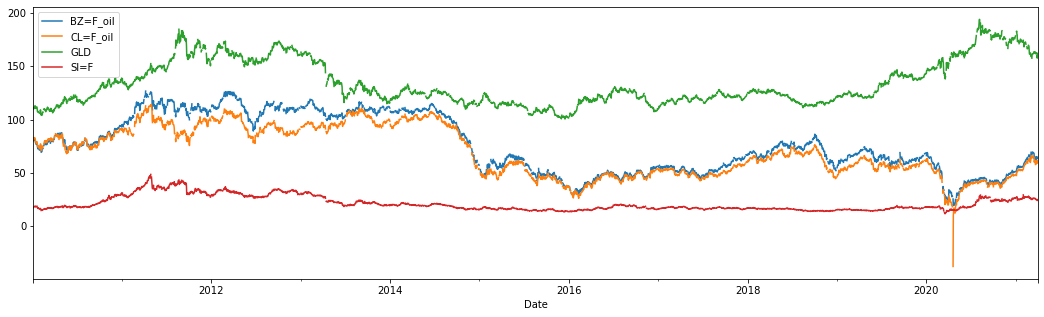

In [73]:
# візуалізація
df_commodities.plot(figsize= (18, 5));

### Companies

In [74]:
path_companies = PATH + r'\data\companies\ '

In [75]:
# назви файів з показниками компаній
csv_files = get_files(path_companies)
csv_files

['AAPL.csv',
 'BAC.csv',
 'C.csv',
 'CS.csv',
 'DB.csv',
 'GSBD(march-19-2015).csv',
 'HRI.csv',
 'JPM.csv',
 'LYG.csv',
 'MAN.csv',
 'MS.csv',
 'MUFG.csv',
 'UBS.csv']

In [76]:
# відображення датасетів
display_dfs(csv_files, path_companies)

AAPL.csv
         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.583586  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.594968  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.490066  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.478067  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.521136  447610800
--------------------------------------------------
BAC.csv
         Date       Open       High        Low      Close  Adj Close  \
0  2010-01-04  15.240000  15.750000  15.120000  15.690000  13.663458   
1  2010-01-05  15.740000  16.209999  15.700000  16.200001  14.107587   
2  2010-01-06  16.209999  16.540001  16.030001  16.389999  14.273045   
3  2010-01-07  16.680000  17.190001  16.510000  16.930000  14.743298   
4  2010-01-08  16.980000  17.100000  16.629999  16.780001  14.612673   

      Volume  
0  180845200  
1  209521300 

In [77]:
# додання до загального датасету
df_companies = merge_dfs(df_commodities, csv_files, path_companies)
df_companies

AAPL.csv
BAC.csv
C.csv
CS.csv
DB.csv
GSBD(march-19-2015).csv
HRI.csv
JPM.csv
LYG.csv
MAN.csv
MS.csv
MUFG.csv
UBS.csv


,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),HRI,JPM,LYG,MAN,MS,MUFG,UBS
Date,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,35.639999,42.849998,3.41,56.410000,30.910000,4.97,16.020000
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,35.310001,43.680000,3.54,57.130001,32.040001,4.99,16.139999
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,34.860001,43.919998,3.57,58.200001,32.450001,5.14,16.090000
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,34.950001,44.790001,3.74,59.919998,32.919998,5.18,16.150000
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,36.540001,44.680000,3.72,59.650002,32.250000,5.20,16.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,94.599998,152.679993,2.28,99.800003,77.879997,5.66,15.590000
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,98.349998,154.479996,2.33,101.309998,79.089996,5.55,15.600000


In [78]:
# df_companies['GSBD(march-19-2015)'][:'2015-03-20']

In [79]:
# mask = df_companies['GSBD(march-19-2015)'].index <= '2015-03-18'
# df_companies['GSBD(march-19-2015)'] = df_companies['GSBD(march-19-2015)'].mask(mask, df_companies['GSBD(march-19-2015)'] \
#                                                                                .fillna(0))

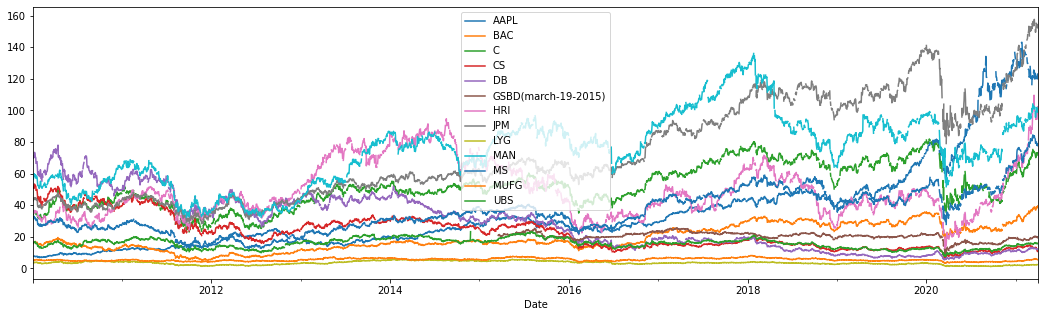

In [80]:
# візуалізація
df_companies[df_companies.columns[4:]].plot(figsize=(18,5));

In [81]:
# filled_df_companies = filling_nan(df_companies)
# filled_df_companies.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\df_comm_comp.csv')

### FX

In [82]:
path_fx = PATH + r'\data\FX\ '

In [83]:
# назви файлів з даними закордонних валют
csv_files = get_files(path_fx)
csv_files

['CNYUSD=X.csv',
 'EURUSD=X.csv',
 'GBPUSD=X.csv',
 'JPYUSD=X.csv',
 'RUBUSD=X.csv']

In [84]:
# відображення відповідних датафреймів
display_dfs(csv_files, path_fx)

CNYUSD=X.csv
         Date      Open      High       Low     Close  Adj Close  Volume
0  2010-01-04  0.146694  0.146694  0.146694  0.146694   0.146694     0.0
1  2010-01-05  0.146692  0.146692  0.146692  0.146692   0.146692     0.0
2  2010-01-06  0.146692  0.146692  0.146664  0.146664   0.146664     0.0
3  2010-01-07  0.146664  0.146675  0.146664  0.146675   0.146675     0.0
4  2010-01-08  0.146671  0.146681  0.146671  0.146681   0.146681     0.0
--------------------------------------------------
EURUSD=X.csv
         Date      Open      High       Low     Close  Adj Close  Volume
0  2010-01-04  1.431004  1.445191  1.426208  1.442398   1.442398     0.0
1  2010-01-05  1.442710  1.448310  1.435194  1.436596   1.436596     0.0
2  2010-01-06  1.436596  1.443460  1.429123  1.440403   1.440403     0.0
3  2010-01-07  1.440300  1.444481  1.430206  1.431803   1.431803     0.0
4  2010-01-08  1.432090  1.443606  1.427104  1.441109   1.441109     0.0
-----------------------------------------------

In [85]:
# додання до загального дф
df_fx = merge_dfs(df_companies, csv_files, path_fx)
df_fx

CNYUSD=X.csv
EURUSD=X.csv
GBPUSD=X.csv
JPYUSD=X.csv
RUBUSD=X.csv


,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,LYG,MAN,MS,MUFG,UBS,CNYUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,RUBUSD=X
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,3.41,56.410000,30.910000,4.97,16.020000,0.146694,1.442398,1.611370,0.010811,0.032988
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,3.54,57.130001,32.040001,4.99,16.139999,0.146692,1.436596,1.599079,0.010919,0.033339
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,3.57,58.200001,32.450001,5.14,16.090000,0.146664,1.440403,1.602384,0.010828,0.033339
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,3.74,59.919998,32.919998,5.18,16.150000,0.146675,1.431803,1.593397,0.010708,0.033339
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,3.72,59.650002,32.250000,5.20,16.740000,0.146681,1.441109,1.602410,0.010792,0.033483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,2.28,99.800003,77.879997,5.66,15.590000,0.152893,1.178800,1.379101,0.009108,0.013217
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,2.33,101.309998,79.089996,5.55,15.600000,0.152237,1.177101,1.377505,0.009104,0.013218


In [86]:
# filled_df_fx = filling_nan(df_fx)

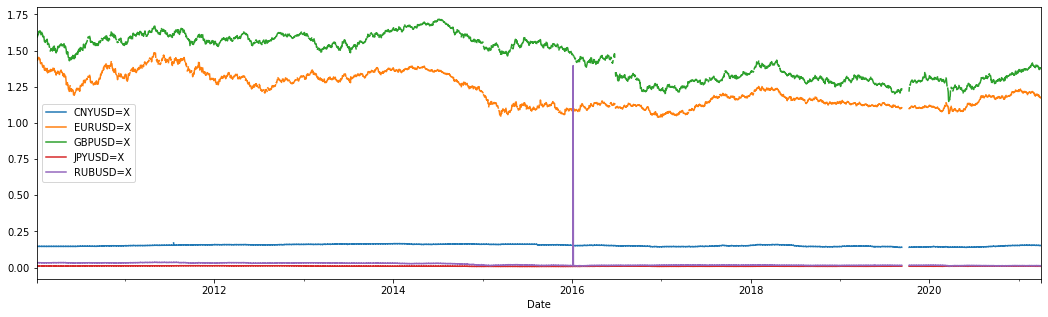

In [87]:
# візуалізація
df_fx[df_fx.columns[17:]].plot(figsize=(18,5));

In [88]:
# filled_df_fx.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\df_comm_comp_fx.csv')

### GoogleTrends

In [89]:
# отримання сформованих даних гугл трендів
google_trends_df = pd.read_csv(PATH + r'\data\google_trends\GSGoogleTrends_final.csv', \
                               index_col='date')

In [90]:
google_trends_df.head(5)

,daily_data,monthly_data,adjusted_data
date,,,
2010-01-01,20,0.37,7.40
2010-01-02,25,0.37,9.25
2010-01-03,25,0.37,9.25
2010-01-04,49,0.37,18.13
2010-01-05,39,0.37,14.43


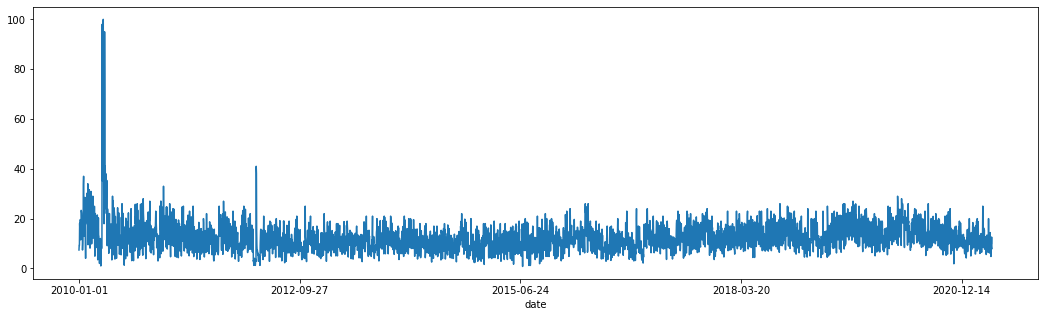

In [91]:
# візуалізація
google_trends_df['adjusted_data'].plot(figsize=(18,5));

In [92]:
# додання гугл-трендів в єдиний датасет
df_gt = pd.merge(df_fx, google_trends_df['adjusted_data'], how='left', left_index=True, right_index=True)
df_gt.rename({'adjusted_data':'google_trends_GS'}, axis =1, inplace=True) # зміна назви ознаки
df_gt

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MAN,MS,MUFG,UBS,CNYUSD=X,EURUSD=X,GBPUSD=X,JPYUSD=X,RUBUSD=X,google_trends_GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,56.410000,30.910000,4.97,16.020000,0.146694,1.442398,1.611370,0.010811,0.032988,18.13
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,57.130001,32.040001,4.99,16.139999,0.146692,1.436596,1.599079,0.010919,0.033339,14.43
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,58.200001,32.450001,5.14,16.090000,0.146664,1.440403,1.602384,0.010828,0.033339,12.58
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,59.919998,32.919998,5.18,16.150000,0.146675,1.431803,1.593397,0.010708,0.033339,19.61
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,59.650002,32.250000,5.20,16.740000,0.146681,1.441109,1.602410,0.010792,0.033483,17.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.25
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,99.800003,77.879997,5.66,15.590000,0.152893,1.178800,1.379101,0.009108,0.013217,12.50
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,101.309998,79.089996,5.55,15.600000,0.152237,1.177101,1.377505,0.009104,0.013218,12.75


In [93]:
# df_gt.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\df_comm_comp_fx_gt.csv')

### Indicators

In [94]:
path_indicators = PATH + r'\data\indicators\ '

In [95]:
# назви файлів економічних індикатоів
csv_files = get_files(path_indicators)
csv_files

['10YBIR.csv',
 'CPALTT01USM657N(monthly).csv',
 'DFF.csv',
 'GDP(quarterly).csv',
 'GDPC1(quarterly).csv',
 'LIBOR.csv',
 'M2SL(monthly).csv',
 'MEDCPIM158SFRBCLE(monthly).csv',
 'PPIACO(monthly).csv',
 'UNRATE(monthly).csv',
 'US10-YearBondYield.csv',
 '^TNX.csv',
 '^VIX.csv']

In [96]:
# відображення датафреймів
display_dfs(csv_files, path_indicators)

10YBIR.csv
         Date  Value
0  2010-01-04   2.38
1  2010-01-05   2.34
2  2010-01-06   2.37
3  2010-01-07   2.41
4  2010-01-08   2.42
--------------------------------------------------
CPALTT01USM657N(monthly).csv
         DATE  CPALTT01USM657N
0  2010-01-01         0.341747
1  2010-02-01         0.024921
2  2010-03-01         0.410628
3  2010-04-01         0.173688
4  2010-05-01         0.077520
--------------------------------------------------
DFF.csv
         DATE   DFF
0  2010-01-01  0.05
1  2010-01-02  0.05
2  2010-01-03  0.05
3  2010-01-04  0.12
4  2010-01-05  0.12
--------------------------------------------------
GDP(quarterly).csv
         DATE        GDP
0  2010-01-01  14721.350
1  2010-04-01  14926.098
2  2010-07-01  15079.917
3  2010-10-01  15240.843
4  2011-01-01  15285.828
--------------------------------------------------
GDPC1(quarterly).csv
         DATE      GDPC1
0  2010-01-01  15415.145
1  2010-04-01  15557.277
2  2010-07-01  15671.967
3  2010-10-01  15750.625
4

In [97]:
df_gt.shape

(4106, 23)

#### Daily dfs

In [98]:
csv_files

['10YBIR.csv',
 'CPALTT01USM657N(monthly).csv',
 'DFF.csv',
 'GDP(quarterly).csv',
 'GDPC1(quarterly).csv',
 'LIBOR.csv',
 'M2SL(monthly).csv',
 'MEDCPIM158SFRBCLE(monthly).csv',
 'PPIACO(monthly).csv',
 'UNRATE(monthly).csv',
 'US10-YearBondYield.csv',
 '^TNX.csv',
 '^VIX.csv']

In [99]:
# показник  10YBIR
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\10YBIR.csv')
df_.set_index('Date', inplace=True)
df_.rename({'Value':'10YBIR'}, axis=1, inplace=True) # зміна назви ознаки

df_

,10YBIR
Date,
2010-01-04,2.38
2010-01-05,2.34
2010-01-06,2.37
2010-01-07,2.41
2010-01-08,2.42
...,...
2021-04-26,2.36
2021-04-27,2.39
2021-04-28,2.41


In [100]:
# додання в загальний датасет
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [101]:
# показник DFF
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\DFF.csv')
df_['Date'] = pd.to_datetime(df_['DATE'])
df_.drop('DATE', axis=1, inplace=True)
df_.set_index('Date', inplace=True)
# df_ = df_[['Close']]

df_

,DFF
Date,
2010-01-01,0.05
2010-01-02,0.05
2010-01-03,0.05
2010-01-04,0.12
2010-01-05,0.12
...,...
2021-04-25,0.07
2021-04-26,0.07
2021-04-27,0.07


In [102]:
# додання в загальний датасет
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [103]:
# показник LIBOR
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\LIBOR.csv')
df_['Date'] = pd.to_datetime(df_['DATE'])
df_.drop('DATE', axis=1, inplace=True)
df_.set_index('Date', inplace=True)
df_=df_.rename({'USD1MTD156N':'LIBOR'}, axis=1)
df_

,LIBOR
Date,
2010-01-04,0.23344
2010-01-05,0.23344
2010-01-06,0.23219
2010-01-07,0.23125
2010-01-08,0.23313
...,...
2021-04-20,0.1075
2021-04-21,0.11025
2021-04-22,0.10613


In [104]:
# додання в загальний датасет
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [105]:
# показник US10-YearBondYield
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\US10-YearBondYield.csv')
df_['Date'] = pd.to_datetime(df_['Date'])
df_.set_index('Date', inplace=True)
df_.sort_values(by='Date', inplace=True)
df_ = df_[['Price']]
df_ =df_.rename({'Price':'10YearBondUS'},axis =1)

df_

,10YearBondUS
Date,
2010-01-04,3.823
2010-01-05,3.763
2010-01-06,3.829
2010-01-07,3.827
2010-01-08,3.836
...,...
2021-04-28,1.613
2021-04-29,1.643
2021-04-30,1.626


In [106]:
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [107]:
# показник TNX
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\^TNX.csv')
df_['Date'] = pd.to_datetime(df_['Date'])
df_.set_index('Date', inplace=True)
df_.sort_values(by='Date', inplace=True)

df_ = df_[['Close']]
df_ =df_.rename({'Close':'TNX'},axis =1)

df_

,TNX
Date,
2010-01-04,3.841
2010-01-05,3.755
2010-01-06,3.808
2010-01-07,3.822
2010-01-08,3.808
...,...
2021-04-27,1.622
2021-04-28,1.620
2021-04-29,1.640


In [108]:
# додання в загальний датасет
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [109]:
# показник VIX
df_ = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\indicators\^VIX.csv')
df_['Date'] = pd.to_datetime(df_['Date'])
df_.set_index('Date', inplace=True)
df_.sort_values(by='Date', inplace=True)

df_ = df_[['Close']]
df_ =df_.rename({'Close':'VIX'},axis =1)

df_

,VIX
Date,
2010-01-04,20.040001
2010-01-05,19.350000
2010-01-06,19.160000
2010-01-07,19.059999
2010-01-08,18.129999
...,...
2021-04-26,17.639999
2021-04-27,17.559999
2021-04-28,17.280001


In [110]:
# додання в загальний датасет
df_gt = pd.merge(df_gt, df_, how='left', left_index=True, right_index=True)

In [111]:
# розмірність отриманоого датасету
df_gt.shape

(4106, 29)

In [112]:
# df_gt.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\df_indicators_daily.csv')

#### Monthly dfs

In [113]:
csv_files

['10YBIR.csv',
 'CPALTT01USM657N(monthly).csv',
 'DFF.csv',
 'GDP(quarterly).csv',
 'GDPC1(quarterly).csv',
 'LIBOR.csv',
 'M2SL(monthly).csv',
 'MEDCPIM158SFRBCLE(monthly).csv',
 'PPIACO(monthly).csv',
 'UNRATE(monthly).csv',
 'US10-YearBondYield.csv',
 '^TNX.csv',
 '^VIX.csv']

In [118]:
monthly_data = ['CPALTT01USM657N(monthly)', 'M2SL(monthly)', 'MEDCPIM158SFRBCLE(monthly)', 'PPIACO(monthly)', 'UNRATE(monthly)']
monthly_cols = ['CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO', 'UNRATE']

In [115]:
# заповнення щомісячних даних в щоденний датасет
monthly_dfs = append_till_date(monthly_data,'MS')

            CPALTT01USM657N
DATE                       
2010-01-01         0.341747
2010-02-01         0.024921
2010-03-01         0.410628
2010-04-01         0.173688
2010-05-01         0.077520
...                     ...
2020-12-01         0.094148
2021-01-01         0.425378
2021-02-01         0.547438
2021-03-01              NaN
2021-04-01              NaN

[136 rows x 1 columns]
               M2SL
DATE               
2010-01-01   8458.5
2010-02-01   8508.2
2010-03-01   8505.2
2010-04-01   8535.8
2010-05-01   8590.7
...             ...
2020-12-01  19125.8
2021-01-01  19378.7
2021-02-01  19650.3
2021-03-01  19896.2
2021-04-01      NaN

[136 rows x 1 columns]
            MEDCPIM158SFRBCLE
DATE                         
2010-01-01           0.680111
2010-02-01          -0.106628
2010-03-01          -0.286064
2010-04-01           0.452616
2010-05-01           0.275748
...                       ...
2020-12-01           1.731006
2021-01-01           0.976160
2021-02-01           2.83634

In [116]:
monthly_dfs[monthly_data[0]]

,CPALTT01USM657N
DATE,
2010-01-01,0.341747
2010-02-01,0.024921
2010-03-01,0.410628
2010-04-01,0.173688
2010-05-01,0.077520
...,...
2020-12-01,0.094148
2021-01-01,0.425378
2021-02-01,0.547438


In [ ]:
# df_gt = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\df_indicators_daily.csv',\
#                     index_col='Date')


In [117]:
# перейменування ознак (replace('(monthly)')
df_gt.index = pd.to_datetime(df_gt.index)
for f in monthly_data:
    mothly_df = monthly_dfs[f]
    
    df_gt[f.replace('(monthly)', '')] = df_gt.index.map(lambda x: x.replace(day=1)).map(mothly_df[f.replace('(monthly)', '')])
    
df_gt

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,DFF,LIBOR,10YearBondUS,TNX,VIX,CPALTT01USM657N,M2SL,MEDCPIM158SFRBCLE,PPIACO,UNRATE
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,0.12,0.23344,3.823,3.841,20.040001,0.341747,8458.5,0.680111,181.9,9.8
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,0.12,0.23344,3.763,3.755,19.350000,0.341747,8458.5,0.680111,181.9,9.8
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,0.12,0.23219,3.829,3.808,19.160000,0.341747,8458.5,0.680111,181.9,9.8
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,0.10,0.23125,3.827,3.822,19.059999,0.341747,8458.5,0.680111,181.9,9.8
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,0.11,0.23313,3.836,3.808,18.129999,0.341747,8458.5,0.680111,181.9,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07,NaN,1.672,NaN,NaN,NaN,19896.2,1.833169,216.3,6.0
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,0.07,0.1085,1.717,1.721,20.740000,NaN,19896.2,1.833169,216.3,6.0
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,0.07,0.11513,1.710,1.726,19.610001,NaN,19896.2,1.833169,216.3,6.0


In [ ]:
# df_gt = fill_periods(df_gt, monthly_data, monthly_dfs, 'monthly')

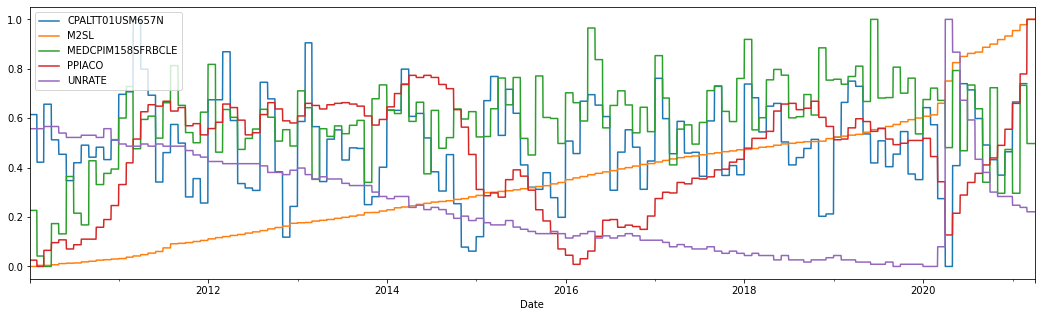

In [119]:
# візуалізація щомісячних даних
dfa = df_gt[monthly_cols]   #.interpolate(method='linear')
dfa = (dfa-dfa.min())/(dfa.max()-dfa.min())
dfa.plot(figsize=(18,5));

#### Quarterly dfs

In [120]:
csv_files

['10YBIR.csv',
 'CPALTT01USM657N(monthly).csv',
 'DFF.csv',
 'GDP(quarterly).csv',
 'GDPC1(quarterly).csv',
 'LIBOR.csv',
 'M2SL(monthly).csv',
 'MEDCPIM158SFRBCLE(monthly).csv',
 'PPIACO(monthly).csv',
 'UNRATE(monthly).csv',
 'US10-YearBondYield.csv',
 '^TNX.csv',
 '^VIX.csv']

In [121]:
# щоквартальні дані
quart_data = ['GDP(quarterly)','GDPC1(quarterly)']
quart_cols = ['GDP','GDPC1']

In [122]:
quart_dfs = append_till_date(quart_data, 'QS')

                  GDP
DATE                 
2010-01-01  14721.350
2010-04-01  14926.098
2010-07-01  15079.917
2010-10-01  15240.843
2011-01-01  15285.828
2011-04-01  15496.189
2011-07-01  15591.850
2011-10-01  15796.460
2012-01-01  16019.758
2012-04-01  16152.257
2012-07-01  16257.151
2012-10-01  16358.863
2013-01-01  16569.591
2013-04-01  16637.926
2013-07-01  16848.748
2013-10-01  17083.137
2014-01-01  17104.555
2014-04-01  17432.909
2014-07-01  17721.657
2014-10-01  17849.912
2015-01-01  18003.399
2015-04-01  18223.577
2015-07-01  18347.425
2015-10-01  18378.803
2016-01-01  18470.156
2016-04-01  18656.207
2016-07-01  18821.359
2016-10-01  19032.580
2017-01-01  19237.435
2017-04-01  19379.232
2017-07-01  19617.288
2017-10-01  19937.963
2018-01-01  20242.215
2018-04-01  20552.653
2018-07-01  20742.723
2018-10-01  20909.853
2019-01-01  21115.309
2019-04-01  21329.877
2019-07-01  21540.325
2019-10-01  21747.394
2020-01-01  21561.139
2020-04-01  19520.114
2020-07-01  21170.252
2020-10-01

In [123]:
df_gt

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,DFF,LIBOR,10YearBondUS,TNX,VIX,CPALTT01USM657N,M2SL,MEDCPIM158SFRBCLE,PPIACO,UNRATE
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,0.12,0.23344,3.823,3.841,20.040001,0.341747,8458.5,0.680111,181.9,9.8
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,0.12,0.23344,3.763,3.755,19.350000,0.341747,8458.5,0.680111,181.9,9.8
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,0.12,0.23219,3.829,3.808,19.160000,0.341747,8458.5,0.680111,181.9,9.8
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,0.10,0.23125,3.827,3.822,19.059999,0.341747,8458.5,0.680111,181.9,9.8
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,0.11,0.23313,3.836,3.808,18.129999,0.341747,8458.5,0.680111,181.9,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07,NaN,1.672,NaN,NaN,NaN,19896.2,1.833169,216.3,6.0
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,0.07,0.1085,1.717,1.721,20.740000,NaN,19896.2,1.833169,216.3,6.0
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,0.07,0.11513,1.710,1.726,19.610001,NaN,19896.2,1.833169,216.3,6.0


In [124]:
# заповнення пустих значень
df_gt = fill_periods(df_gt, quart_data, quart_dfs, 'quarterly')

In [125]:
df_gt

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,10YearBondUS,TNX,VIX,CPALTT01USM657N,M2SL,MEDCPIM158SFRBCLE,PPIACO,UNRATE,GDP,GDPC1
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,3.823,3.841,20.040001,0.341747,8458.5,0.680111,181.9,9.8,14721.35,15415.145
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,3.763,3.755,19.350000,0.341747,8458.5,0.680111,181.9,9.8,14721.35,15415.145
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,3.829,3.808,19.160000,0.341747,8458.5,0.680111,181.9,9.8,14721.35,15415.145
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,3.827,3.822,19.059999,0.341747,8458.5,0.680111,181.9,9.8,14721.35,15415.145
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,3.836,3.808,18.129999,0.341747,8458.5,0.680111,181.9,9.8,14721.35,15415.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.672,NaN,NaN,NaN,19896.2,1.833169,216.3,6.0,NaN,NaN
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,1.717,1.721,20.740000,NaN,19896.2,1.833169,216.3,6.0,NaN,NaN
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,1.710,1.726,19.610001,NaN,19896.2,1.833169,216.3,6.0,NaN,NaN


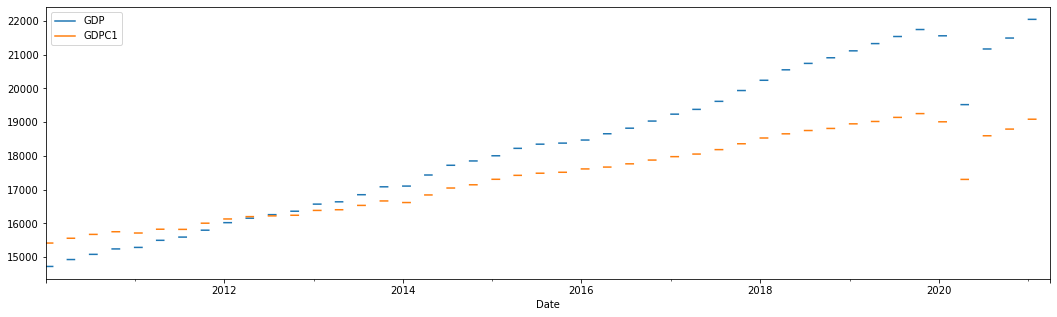

In [127]:
# візуалвзація
dfa = df_gt[quart_cols]   #.interpolate(method='linear')
#dfa = (dfa-dfa.min())/(dfa.max()-dfa.min())
dfa.plot(figsize=(18,5));

In [ ]:
# df_gt_filled = df_gt.copy()
# df_gt_filled = filling_nan(df_gt_filled)
# # df_gt_filled[['TNX', 'VIX'] + monthly_cols+quart_cols] = df_gt[['TNX', 'VIX'] + monthly_cols+quart_cols].interpolate(method='linear')
# df_gt_filled

In [ ]:
# df_gt_filled['TNX', 'VIX'].plot(figsize=(18,5));

### Market indices

In [129]:
path_market_indices = PATH + r'\data\market_indices\ '

In [165]:
# дані показників круних бірж
csv_files = get_files(path_market_indices)
csv_files

['DJIA.csv',
 'FTSE.csv',
 'HSI.csv',
 'IXIC.csv',
 'N225.csv',
 'NYA.csv',
 'RUT.csv',
 'S&P500.csv']

In [131]:
# відображення даних
display_dfs(csv_files, path_market_indices)

DowJonesIndustrialAverage.csv
         Дата       Цена      Откр.      Макс.       Мин.    Объём  Изм. %
0  03.05.2021  34.113,89  34.045,46  34.220,80  34.045,46  278,38M   0,69%
1  30.04.2021  33.879,00  33.907,21  33.963,90  33.786,92  348,12M  -0,53%
2  29.04.2021  34.060,36  33.855,64  34.087,21  33.744,28  409,60M   0,71%
3  28.04.2021  33.820,38  33.860,46  33.946,60  33.805,56  353,02M  -0,48%
4  27.04.2021  33.984,93  33.932,13  34.043,98  33.870,46  294,95M   0,01%
--------------------------------------------------
FTSE.csv
       Date     Open     High      Low    Close
0  04/30/21  6961.48  7009.47  6946.04  6969.81
1  04/29/21  6963.67  7019.76  6953.87  6961.48
2  04/28/21  6944.97  6986.70  6944.06  6963.67
3  04/27/21  6963.12  6975.07  6929.77  6944.97
4  04/26/21  6938.56  6971.52  6913.39  6963.12
--------------------------------------------------
S&P500.csv
         Дата      Цена     Откр.     Макс.      Мин. Объём  Изм. %
0  05.04.2021  4.077,91  4.034,44  4.083,4

In [231]:
dfs = []
for f in csv_files:
    df = pd.read_csv(PATH + r'\data\market_indices\{}'.format(f))
    
    date_set = set(['Дата', 'Date'])
    date_intersection = ' '.join(set(df.columns).intersection(date_set))# визначення колонок з датою
    
    df.rename({date_intersection: 'Date'}, axis=1, inplace=True)# перейменування
    
    
    stock_set = set(['Цена', 'Close'])
    stock_intersection = ' '.join(set(df.columns).intersection(stock_set))# визначення колонок некоректною назвою
    
    df.rename({stock_intersection: f[:-4]}, axis=1, inplace=True)# перейменуваня
    
    df = df[['Date', f[:-4]]]
    df['Date'] = pd.to_datetime(df['Date'])# зміна типу даних дати
    df.set_index('Date', inplace=True)
   
    df.sort_index(inplace=True)# впорядкування за датою
    dfs.append(df)
    
    

In [232]:
dfs

[                 DJIA
 Date                 
 2010-01-02  10.185,53
 2010-01-03  10.403,79
 2010-01-04  10.927,07
 2010-01-06  10.024,02
 2010-01-07   9.732,53
 ...               ...
 2021-11-03  32.485,59
 2021-12-01  31.068,69
 2021-12-02  31.458,40
 2021-12-03  32.778,64
 2021-12-04  33.745,40
 
 [2851 rows x 1 columns],
                FTSE
 Date               
 2010-01-01  5412.88
 2010-01-04  5500.34
 2010-01-05  5522.50
 2010-01-06  5530.04
 2010-01-07  5526.72
 ...             ...
 2021-04-26  6963.12
 2021-04-27  6944.97
 2021-04-28  6963.67
 2021-04-29  6961.48
 2021-04-30  6969.81
 
 [2947 rows x 1 columns],
                      HSI
 Date                    
 2010-01-04  21823.279297
 2010-01-05  22279.580078
 2010-01-06  22416.669922
 2010-01-07  22269.449219
 2010-01-08  22296.750000
 ...                  ...
 2021-04-26  28952.830078
 2021-04-27  28941.539063
 2021-04-28  29071.339844
 2021-04-29  29303.259766
 2021-04-30  28724.880859
 
 [2796 rows x 1 columns],
      

In [182]:
market_indices_cols = [i[:-4] for i in csv_files]
market_indices_cols

['DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA', 'RUT', 'S&P500']

In [191]:
market_indices_dfs = dict(zip(market_indices_cols, dfs))

In [192]:
market_indices_dfs['DJIA']

,DJIA
Date,
2010-01-02,"10.185,53"
2010-01-03,"10.403,79"
2010-01-04,"10.927,07"
2010-01-06,"10.024,02"
2010-01-07,"9.732,53"
...,...
2021-11-03,"32.485,59"
2021-12-01,"31.068,69"
2021-12-02,"31.458,40"


In [235]:
q = market_indices_dfs['DJIA'] = market_indices_dfs['DJIA']
q = q[q.index <= '2021-05-01']
market_indices_dfs['DJIA'] = q

In [236]:
market_indices_dfs['DJIA']

,DJIA
Date,
2010-01-02,"10.185,53"
2010-01-03,"10.403,79"
2010-01-04,"10.927,07"
2010-01-06,"10.024,02"
2010-01-07,"9.732,53"
...,...
2021-04-27,"33.984,93"
2021-04-28,"33.820,38"
2021-04-29,"34.060,36"


In [237]:
# заповнення щоденних даних для індексів бірж
def append_till_date_market_indices(period_data, freq):
    dfs = []
    for f in period_data:
        df_ = market_indices_dfs[f]
        empty_df = pd.DataFrame()
        empty_df['Date'] = pd.date_range(start=str(df_.index[::-1][0]), end='2021-04-01', freq=freq) # необхідний період часу
        empty_df = empty_df[ 1:]
        empty_df.set_index("Date", inplace=True)
        df_ = df_.append(empty_df, ignore_index=False)
        dfs.append(df_)
        print(df_)
    period_dfs = dict(zip(period_data, dfs))
    
    return period_dfs

In [238]:
complete_market_indices_dfs = append_till_date_market_indices(market_indices_cols, 'D')

                 DJIA
Date                 
2010-01-02  10.185,53
2010-01-03  10.403,79
2010-01-04  10.927,07
2010-01-06  10.024,02
2010-01-07   9.732,53
...               ...
2021-04-27  33.984,93
2021-04-28  33.820,38
2021-04-29  34.060,36
2021-04-30  33.879,00
2021-05-01  30.391,60

[2828 rows x 1 columns]
               FTSE
Date               
2010-01-01  5412.88
2010-01-04  5500.34
2010-01-05  5522.50
2010-01-06  5530.04
2010-01-07  5526.72
...             ...
2021-04-26  6963.12
2021-04-27  6944.97
2021-04-28  6963.67
2021-04-29  6961.48
2021-04-30  6969.81

[2947 rows x 1 columns]
                     HSI
Date                    
2010-01-04  21823.279297
2010-01-05  22279.580078
2010-01-06  22416.669922
2010-01-07  22269.449219
2010-01-08  22296.750000
...                  ...
2021-04-26  28952.830078
2021-04-27  28941.539063
2021-04-28  29071.339844
2021-04-29  29303.259766
2021-04-30  28724.880859

[2796 rows x 1 columns]
                    IXIC
Date                    
2010

In [254]:
for i, df in complete_market_indices_dfs.items():
    df_gt = pd.merge(df_gt, df, how='left', left_index=True, right_index=True)

In [255]:
df_gt

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,GDP,GDPC1,DJIA,FTSE,HSI,IXIC,N225,NYA,RUT,S&P500
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,NaN,...,14721.35,15415.145,"10.927,07",5500.34,21823.279297,2308.419922,10654.790039,7326.740234,640.099976,"1.178,10"
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,NaN,...,14721.35,15415.145,NaN,5522.50,22279.580078,2308.709961,10681.830078,7354.870117,638.489990,NaN
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,NaN,...,14721.35,15415.145,"10.024,02",5530.04,22416.669922,2301.090088,10731.450195,7377.700195,637.950012,"1.070,71"
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,NaN,...,14721.35,15415.145,"9.732,53",5526.72,22269.449219,2300.050049,10681.660156,7393.930176,641.969971,"1.027,37"
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,NaN,...,14721.35,15415.145,NaN,5534.24,22296.750000,2317.169922,10798.320313,7425.350098,644.559998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,64.980003,61.560001,160.309998,24.747000,121.389999,38.310001,71.580002,11.390000,11.950000,19.850000,...,NaN,NaN,"33.171,37",6736.17,28338.300781,13059.650391,29384.519531,15611.879883,2158.679932,"3.971,09"
2021-03-30,64.139999,60.549999,157.570007,24.121000,119.900002,38.990002,72.959999,10.990000,12.110000,19.520000,...,NaN,NaN,"33.066,96",6772.12,28577.500000,13045.389648,29432.699219,15626.110352,2195.800049,"3.958,55"


In [256]:
df_gt.shape

(4106, 44)

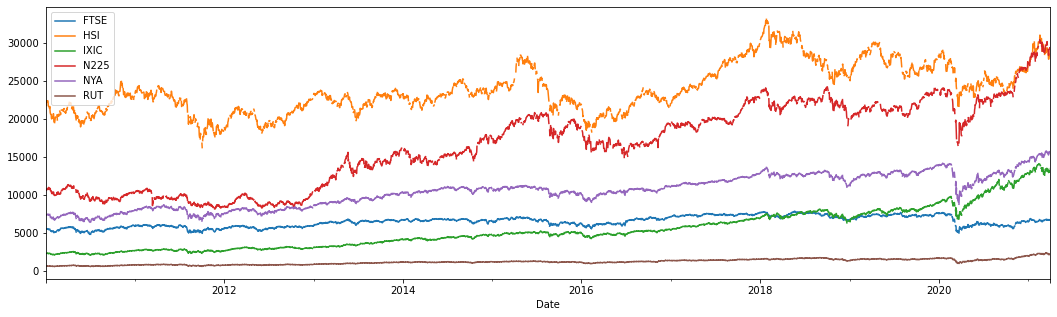

In [260]:
df_gt[df_gt.columns[36:]].plot(figsize=(18,5));# візуалізація

BZ=F_oil               1334
CL=F_oil               1298
GLD                    1275
SI=F                   1299
AAPL                   1275
BAC                    1275
C                      1275
CS                     1275
DB                     1275
GSBD(march-19-2015)    2585
HRI                    1275
JPM                    1275
LYG                    1275
MAN                    1275
MS                     1275
MUFG                   1275
UBS                    1275
CNYUSD=X               1198
EURUSD=X               1197
GBPUSD=X               1197
JPYUSD=X               1197
RUBUSD=X               1197
google_trends_GS          0
10YBIR                 1292
DFF                       0
LIBOR                  1172
10YearBondUS            818
TNX                    1299
VIX                    1275
CPALTT01USM657N          32
M2SL                      1
MEDCPIM158SFRBCLE         1
PPIACO                    1
UNRATE                    1
GDP                    2725
GDPC1               

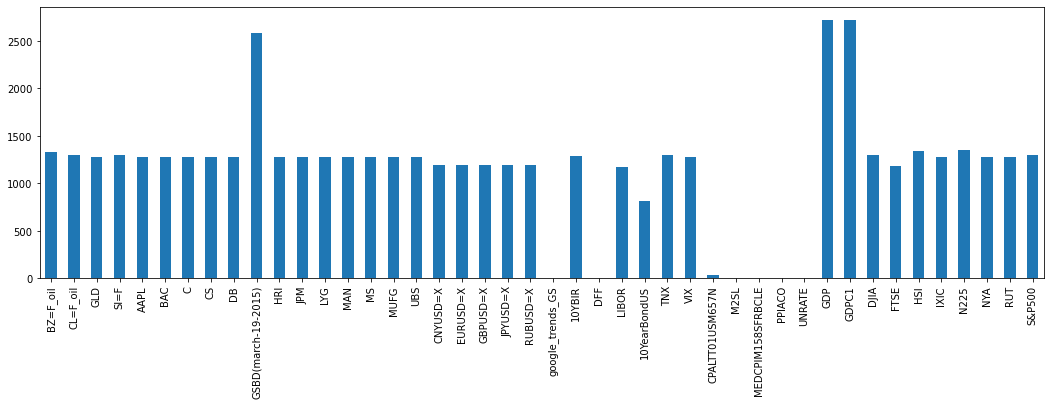

In [274]:
# кідбкість пропущених значенб
nan_vals_quan = df_gt.isna().sum()
nan_vals_quan.plot.bar(figsize=(18,5));
nan_vals_quan

In [263]:
df_gt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4106 entries, 2010-01-04 to 2021-04-01
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BZ=F_oil             2772 non-null   float64
 1   CL=F_oil             2808 non-null   float64
 2   GLD                  2831 non-null   float64
 3   SI=F                 2807 non-null   float64
 4   AAPL                 2831 non-null   float64
 5   BAC                  2831 non-null   float64
 6   C                    2831 non-null   float64
 7   CS                   2831 non-null   float64
 8   DB                   2831 non-null   float64
 9   GSBD(march-19-2015)  1521 non-null   float64
 10  HRI                  2831 non-null   float64
 11  JPM                  2831 non-null   float64
 12  LYG                  2831 non-null   float64
 13  MAN                  2831 non-null   float64
 14  MS                   2831 non-null   float64
 15  MUFG                

In [275]:
# df_gt.to_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\pre_ready_data\ready_df_with_nan.csv')